In [1]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = image_dataset_from_directory('ffhq')

Found 3143 files belonging to 1 classes.
Metal device set to: Apple M1


In [3]:
data_itr = data.as_numpy_iterator()

In [4]:
import cv2

In [5]:
batch = data_itr.next()

2023-06-19 21:04:36.325434: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
batch[0].shape

(32, 256, 256, 3)

In [7]:
len(batch[0])

32

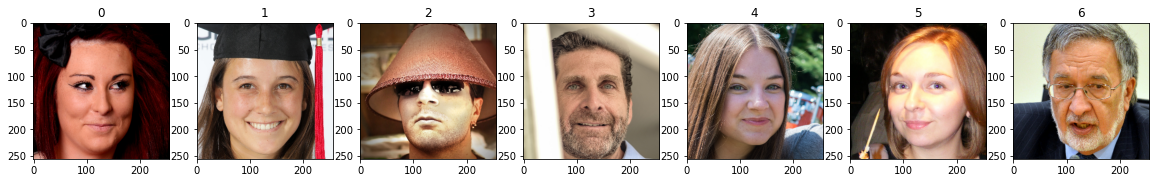

In [8]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(idx)

In [9]:
face = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
mouth = cv2.CascadeClassifier('Haarcascades/haarcascade_mouth.xml')

In [10]:
def eye_mouth_coordinates(gray_img):
    faces = face.detectMultiScale(gray_img, 1.1, 7)
    eye_boxes = []
    mouth_box = None
    
    
    for (x, y, w, h) in faces:
        roi_gray = gray_img[y:y+h, x:x+w]

        eyes = eye.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            eye_boxes.append((x + ex, y + ey, ew, eh))

        mouths = mouth.detectMultiScale(roi_gray)
        for (mx, my, mw, mh) in mouths:
            mouth_box = (x + mx, y + my, mw, mh)

    return eye_boxes, mouth_box
        

In [11]:
co_ord = []
for i in range(len(batch[0])):
    image_data = batch[0][i]
    gray_img = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
    gray_img = np.array(gray_img, dtype='uint8')
    eye_box, mouth_box = eye_mouth_coordinates(gray_img)
    co_ord.append([eye_box, mouth_box])
    

In [12]:
for i in range(len(batch[0])):
    image_data = batch[0][i]
    print(f'image no {i}:\n eyes: {co_ord[i][0]}\n mouth : {co_ord[i][1]}')

image no 0:
 eyes: [(68, 90, 56, 56), (134, 92, 51, 51)]
 mouth : (66, 106, 62, 37)
image no 1:
 eyes: [(68, 98, 48, 48), (137, 99, 45, 45)]
 mouth : (103, 153, 51, 30)
image no 2:
 eyes: []
 mouth : None
image no 3:
 eyes: [(128, 93, 54, 54), (67, 90, 57, 57)]
 mouth : (93, 179, 70, 42)
image no 4:
 eyes: [(76, 103, 39, 39), (138, 102, 40, 40)]
 mouth : (68, 106, 63, 38)
image no 5:
 eyes: [(74, 100, 42, 42), (137, 96, 46, 46)]
 mouth : (120, 100, 85, 51)
image no 6:
 eyes: []
 mouth : (96, 180, 68, 41)
image no 7:
 eyes: [(74, 96, 47, 47), (138, 99, 43, 43)]
 mouth : (136, 113, 49, 29)
image no 8:
 eyes: []
 mouth : None
image no 9:
 eyes: [(106, 151, 22, 22), (145, 109, 27, 27)]
 mouth : (67, 99, 56, 33)
image no 10:
 eyes: [(70, 89, 57, 57)]
 mouth : (90, 177, 66, 40)
image no 11:
 eyes: [(68, 99, 51, 51), (141, 100, 37, 37)]
 mouth : (48, 103, 86, 52)
image no 12:
 eyes: [(140, 107, 29, 29), (79, 103, 39, 39)]
 mouth : (63, 106, 66, 40)
image no 13:
 eyes: [(74, 101, 39, 39), (138